In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DA Assignments(China)/Housing Prices(Classificaion and Regression)/Egypt_Houses_Price.csv')
df

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
...,...,...,...,...,...,...,...,...,...,...,...,...
27356,Town House,890000,3.0,2.0,240.0,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Unknown,North Coast
27357,Town House,4000000,4.0,3.0,218.0,Unknown,Unknown,Unknown,Cash or Installment,Unknown,Finished,New Cairo - El Tagamoa
27358,Twin House,13800000,3.0,4.0,308.0,No,Unknown,Cairo Festival City,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa
27359,Stand Alone Villa,35000000,4.0,4.0,478.0,Unknown,Unknown,Unknown,Unknown Payment,Unknown,Finished,Mokattam


In [ ]:
df.shape

(27361, 12)

In [ ]:
df.columns

Index(['Type', 'Price', 'Bedrooms', 'Bathrooms', 'Area', 'Furnished', 'Level',
       'Compound', 'Payment_Option', 'Delivery_Date', 'Delivery_Term', 'City'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [ ]:
# Convert numeric columns to appropriate data types
numeric_cols = ['Price', 'Bedrooms', 'Bathrooms', 'Area']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, handle errors

# Print the updated data types of the columns
df.dtypes

Type               object
Price             float64
Bedrooms          float64
Bathrooms         float64
Area              float64
Furnished          object
Level              object
Compound           object
Payment_Option     object
Delivery_Date      object
Delivery_Term      object
City               object
dtype: object

In [ ]:
# Check for null values in text columns
text_columns = df.select_dtypes(include=['object']).columns
print("Null values in text columns:")
print(df[text_columns].isnull().sum())

Null values in text columns:
Type              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64


In [ ]:
# Check for null values in numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns
print("\nNull values in numeric columns:")
print(df[numeric_columns].isnull().sum())


Null values in numeric columns:
Price         39
Bedrooms     240
Bathrooms    208
Area         507
dtype: int64


<Axes: >

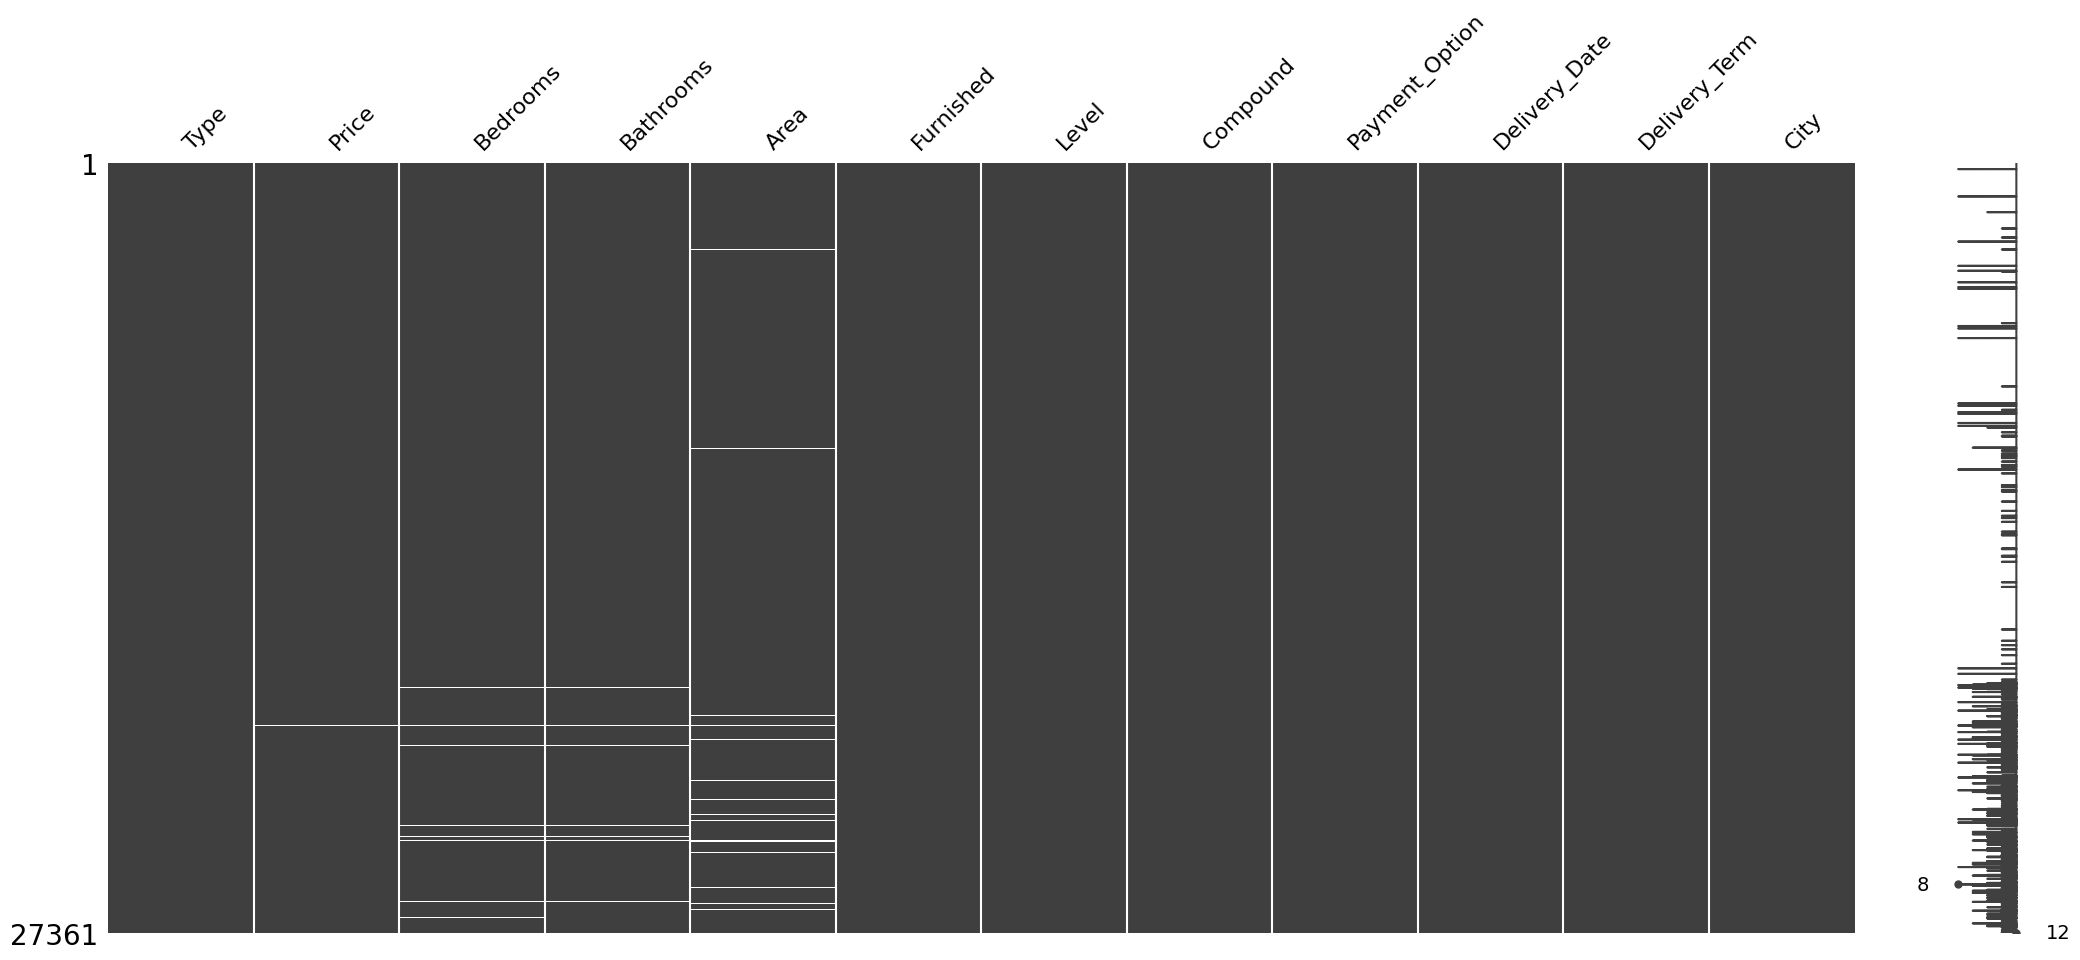

In [ ]:
msno.matrix(df)

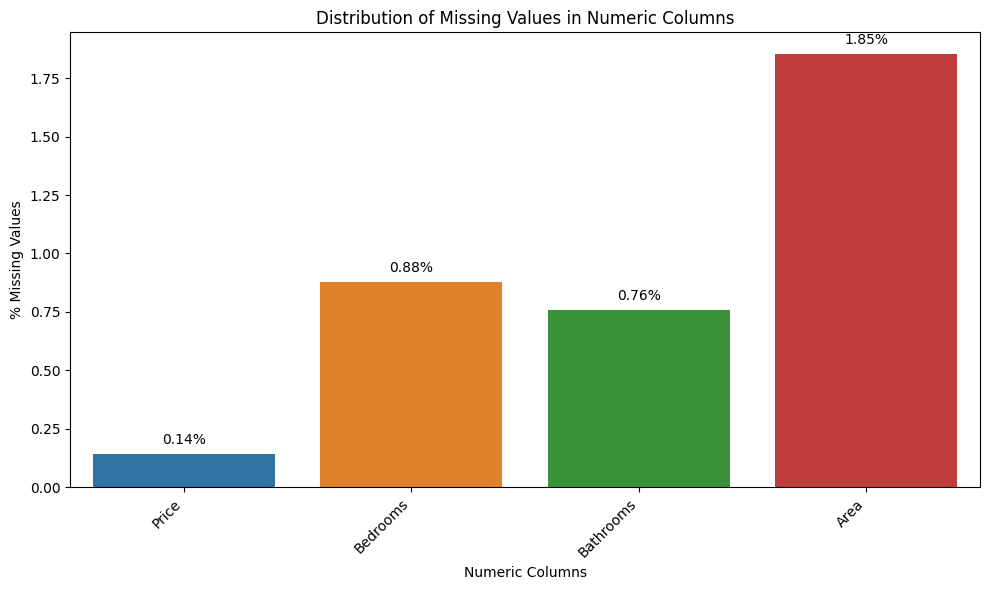

In [ ]:
# Calculate the percentage of missing values for each column
missing_percent = (df.isnull().sum() / len(df)) * 100

# Filter numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Create a bar plot for missing values in numeric columns
plt.figure(figsize=(10, 6))
sns.barplot(x=numeric_columns, y=missing_percent[numeric_columns])
plt.title('Distribution of Missing Values in Numeric Columns')
plt.xticks(rotation=45, ha='right')
plt.ylabel('% Missing Values')
plt.xlabel('Numeric Columns')

# Add missing value count labels within each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plot
plt.tight_layout()
plt.show()

## Handling Object Columns

In [ ]:
# Drop rows with missing values from the dataset
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26692 entries, 0 to 27359
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            26692 non-null  object 
 1   Price           26692 non-null  float64
 2   Bedrooms        26692 non-null  float64
 3   Bathrooms       26692 non-null  float64
 4   Area            26692 non-null  float64
 5   Furnished       26692 non-null  object 
 6   Level           26692 non-null  object 
 7   Compound        26692 non-null  object 
 8   Payment_Option  26692 non-null  object 
 9   Delivery_Date   26692 non-null  object 
 10  Delivery_Term   26692 non-null  object 
 11  City            26692 non-null  object 
dtypes: float64(4), object(8)
memory usage: 2.6+ MB


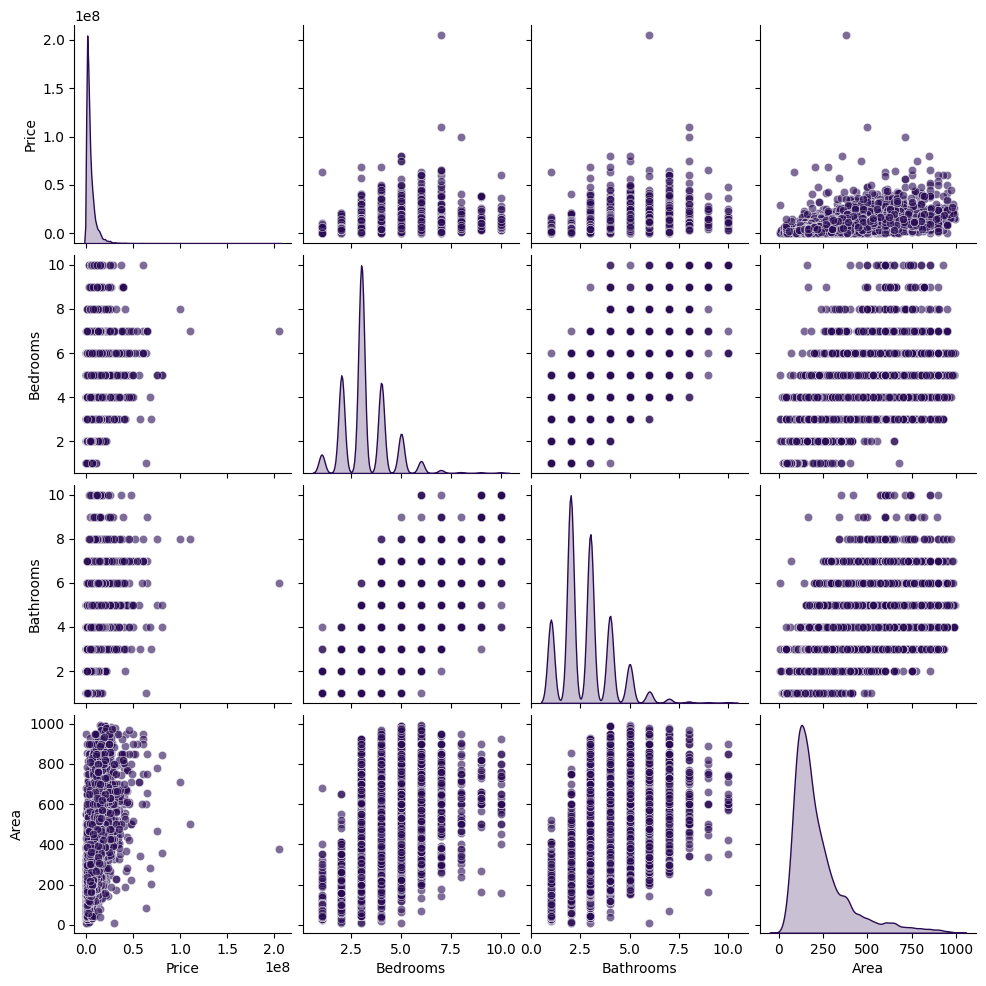

In [ ]:
# Set the Seaborn color palette
sns.set_palette("inferno")  # You can change the palette if needed

# Create a pair plot with added customization
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()

<ipython-input-15-8ffeadc7223a>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(y_labels)
<ipython-input-15-8ffeadc7223a>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(y_labels)
<ipython-input-15-8ffeadc7223a>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_yticklabels(y_labels)


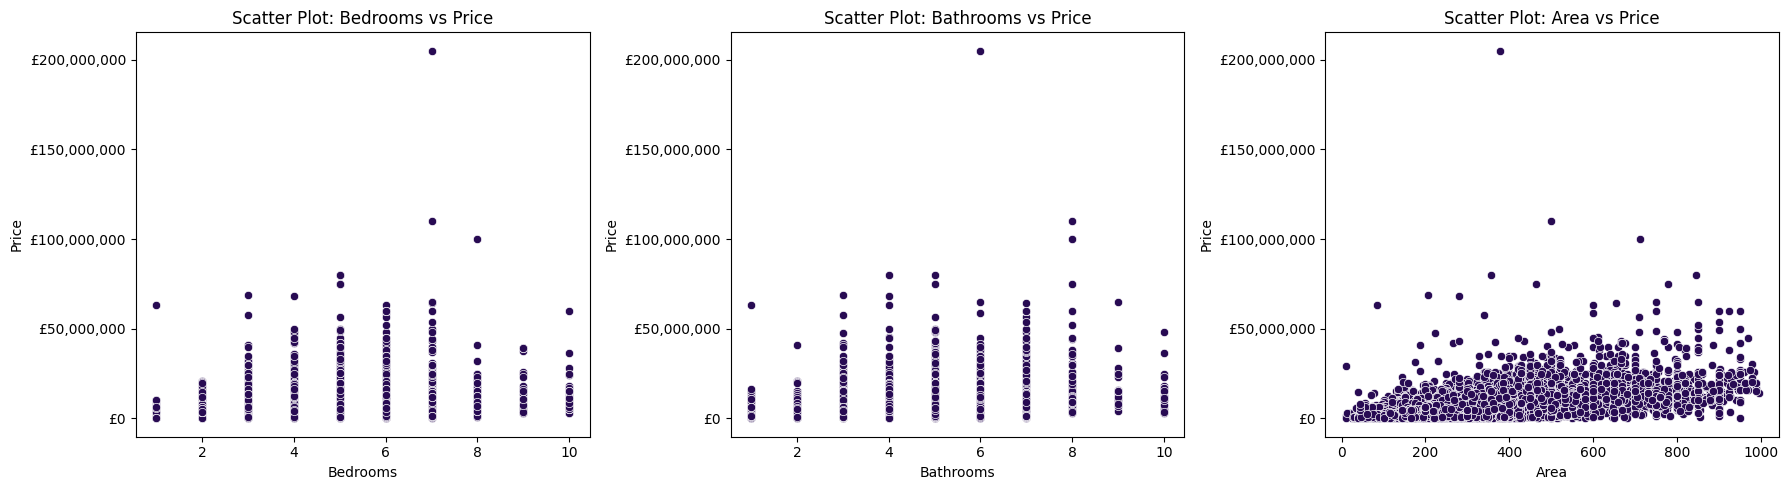

In [ ]:
# Set the Seaborn color palette
sns.set_palette("inferno")  # You can change the palette if needed

# Scatter plots for numeric columns
numeric_columns = ['Bedrooms', 'Bathrooms', 'Area']

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Loop through numeric columns and create scatter plots
for i, column in enumerate(numeric_columns):
    sns.scatterplot(x=column, y='Price', data=df, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Price')
    axes[i].set_title(f'Scatter Plot: {column} vs Price')

    # Set y-axis labels to display actual prices
    y_labels = ['£{:,.0f}'.format(label) for label in axes[i].get_yticks()]
    axes[i].set_yticklabels(y_labels)

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,Price,Bedrooms,Bathrooms,Area
count,2.669200e+04,26692.000000,26692.000000,26692.000000
mean,4.387510e+06,3.200959,2.759703,226.724172
std,5.564757e+06,1.155026,1.280647,157.530522
min,3.000000e+04,1.000000,1.000000,10.000000
25%,1.100000e+06,3.000000,2.000000,125.000000
50%,2.685000e+06,3.000000,3.000000,175.000000
75%,5.550000e+06,4.000000,3.000000,270.000000
max,2.050000e+08,10.000000,10.000000,995.000000


In [ ]:
df = df[df['Price'] <= 15900000]

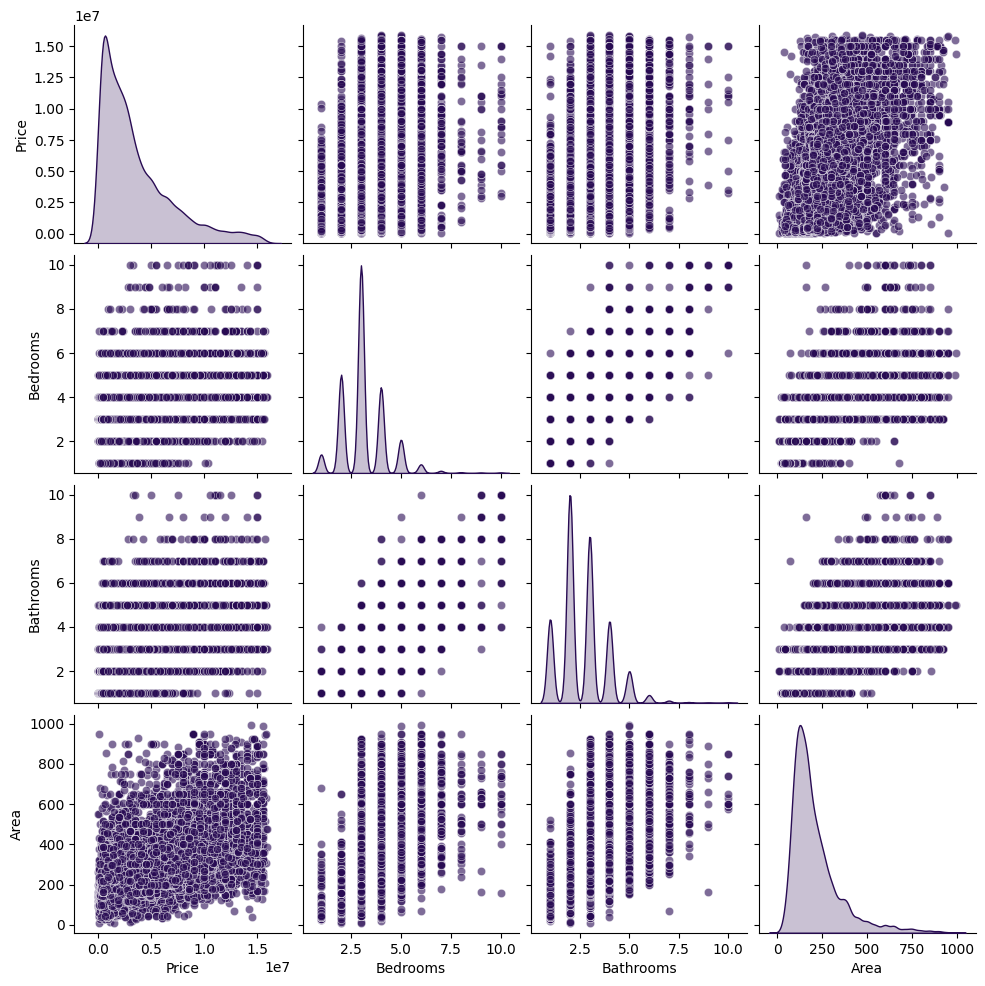

In [ ]:
# Set the Seaborn color palette
sns.set_palette("inferno")  # You can change the palette if needed

# Create a pair plot with added customization
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.show()

<ipython-input-26-229780231351>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


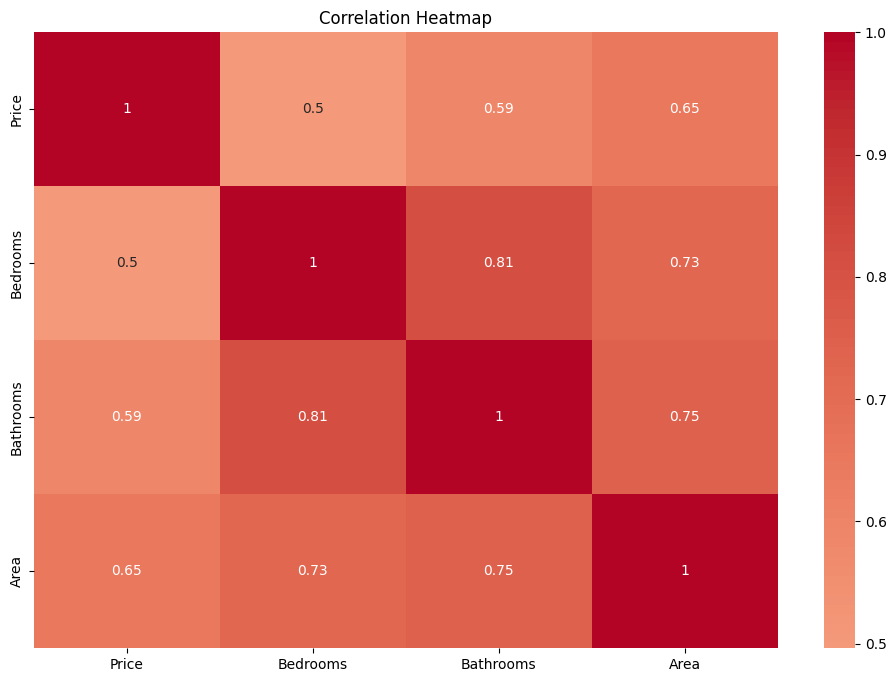

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set the Seaborn color palette
sns.set_palette("coolwarm")  # You can change the palette if needed

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()